In [39]:
import os
import shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [17]:
# original dataset path
original_dataset_dir = 'C:/Users/MOHSEN/JupyterProjects/cv_homework/kaggle_original_data/train'

# creating a directory for smaller dataset
base_dir = 'C:/Users/MOHSEN/JupyterProjects/cv_homework/cats_and_dogs_small'
os.mkdir(base_dir)

In [18]:
# creating a directory for train data
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# creating a directory for validation data
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# creating a directory for test data
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [19]:
# creating a directory for cats in training data
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# creating a directory for dogs in training data
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [20]:
# creating a directory for cats in validation data
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# creating a directory for dogs in validation data
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [21]:
# creating a directory for cats in test data
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# creating a directory for dogs in test data
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [22]:
# copying the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

cat.0.jpg
cat.1.jpg
cat.2.jpg
cat.3.jpg
cat.4.jpg
cat.5.jpg
cat.6.jpg
cat.7.jpg
cat.8.jpg
cat.9.jpg
cat.10.jpg
cat.11.jpg
cat.12.jpg
cat.13.jpg
cat.14.jpg
cat.15.jpg
cat.16.jpg
cat.17.jpg
cat.18.jpg
cat.19.jpg
cat.20.jpg
cat.21.jpg
cat.22.jpg
cat.23.jpg
cat.24.jpg
cat.25.jpg
cat.26.jpg
cat.27.jpg
cat.28.jpg
cat.29.jpg
cat.30.jpg
cat.31.jpg
cat.32.jpg
cat.33.jpg
cat.34.jpg
cat.35.jpg
cat.36.jpg
cat.37.jpg
cat.38.jpg
cat.39.jpg
cat.40.jpg
cat.41.jpg
cat.42.jpg
cat.43.jpg
cat.44.jpg
cat.45.jpg
cat.46.jpg
cat.47.jpg
cat.48.jpg
cat.49.jpg
cat.50.jpg
cat.51.jpg
cat.52.jpg
cat.53.jpg
cat.54.jpg
cat.55.jpg
cat.56.jpg
cat.57.jpg
cat.58.jpg
cat.59.jpg
cat.60.jpg
cat.61.jpg
cat.62.jpg
cat.63.jpg
cat.64.jpg
cat.65.jpg
cat.66.jpg
cat.67.jpg
cat.68.jpg
cat.69.jpg
cat.70.jpg
cat.71.jpg
cat.72.jpg
cat.73.jpg
cat.74.jpg
cat.75.jpg
cat.76.jpg
cat.77.jpg
cat.78.jpg
cat.79.jpg
cat.80.jpg
cat.81.jpg
cat.82.jpg
cat.83.jpg
cat.84.jpg
cat.85.jpg
cat.86.jpg
cat.87.jpg
cat.88.jpg
cat.89.jpg
cat.90.jpg
cat.91.jp

cat.729.jpg
cat.730.jpg
cat.731.jpg
cat.732.jpg
cat.733.jpg
cat.734.jpg
cat.735.jpg
cat.736.jpg
cat.737.jpg
cat.738.jpg
cat.739.jpg
cat.740.jpg
cat.741.jpg
cat.742.jpg
cat.743.jpg
cat.744.jpg
cat.745.jpg
cat.746.jpg
cat.747.jpg
cat.748.jpg
cat.749.jpg
cat.750.jpg
cat.751.jpg
cat.752.jpg
cat.753.jpg
cat.754.jpg
cat.755.jpg
cat.756.jpg
cat.757.jpg
cat.758.jpg
cat.759.jpg
cat.760.jpg
cat.761.jpg
cat.762.jpg
cat.763.jpg
cat.764.jpg
cat.765.jpg
cat.766.jpg
cat.767.jpg
cat.768.jpg
cat.769.jpg
cat.770.jpg
cat.771.jpg
cat.772.jpg
cat.773.jpg
cat.774.jpg
cat.775.jpg
cat.776.jpg
cat.777.jpg
cat.778.jpg
cat.779.jpg
cat.780.jpg
cat.781.jpg
cat.782.jpg
cat.783.jpg
cat.784.jpg
cat.785.jpg
cat.786.jpg
cat.787.jpg
cat.788.jpg
cat.789.jpg
cat.790.jpg
cat.791.jpg
cat.792.jpg
cat.793.jpg
cat.794.jpg
cat.795.jpg
cat.796.jpg
cat.797.jpg
cat.798.jpg
cat.799.jpg
cat.800.jpg
cat.801.jpg
cat.802.jpg
cat.803.jpg
cat.804.jpg
cat.805.jpg
cat.806.jpg
cat.807.jpg
cat.808.jpg
cat.809.jpg
cat.810.jpg
cat.811.jpg
cat.

In [23]:
# copying the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
# copying the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
# copying the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
# copying the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
# copying the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [31]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [34]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [36]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 37s 373ms/step - loss: 0.6911 - acc: 0.5390 - val_loss: 0.6735 - val_acc: 0.6180
Epoch 2/30
100/100 [==============================] - 31s 308ms/step - loss: 0.6619 - acc: 0.5880 - val_loss: 0.6390 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 32s 316ms/step - loss: 0.6081 - acc: 0.6730 - val_loss: 0.5984 - val_acc: 0.6810
Epoch 4/30
100/100 [==============================] - 30s 305ms/step - loss: 0.5660 - acc: 0.7110 - val_loss: 0.6048 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 31s 310ms/step - loss: 0.5392 - acc: 0.7255 - val_loss: 0.6285 - val_acc: 0.6480
Epoch 6/30
100/100 [==============================] - 31s 308ms/step - loss: 0.5068 - acc: 0.7530 - val_loss: 0.6035 - val_acc: 0.6690
Epoch 7/30
100/100 [==============================] - 32s 316ms/step - loss: 0.4850 - acc: 0.7625 - val_loss: 0.55

In [38]:
model.save('cats_and_dogs_small_1.h5')

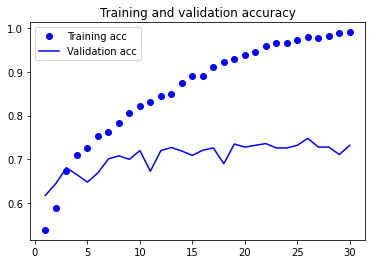

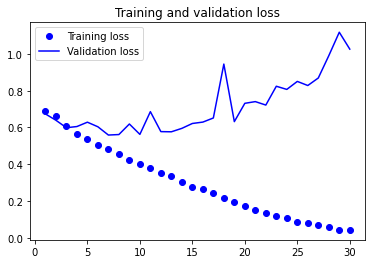

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()